In [4]:
#%reset
%matplotlib inline
from scipy.integrate import odeint 
import numpy as np 
import matplotlib.pyplot as plt

# Geodésicas q-métrica

## Potencial Efectivo 

El potencial efectivo en el artículo de Quevedo es 

$$ \Phi^2=r^2 \left(1-\frac{2m}{r}\right)\left(1+\frac{m^2\sin^2(\theta)}{r^2-2mr}\right)^{-q(q+2)}\left(\frac{d\theta}{d\lambda}\right)^2+\frac{L^2}{r^2\sin^2(\theta)} \left(1-\frac{2m}{r}\right)^{1+2q}+\epsilon \left(1-\frac{2m}{r}\right)^{1+q}$$


(Ecuación 9 sin factorizar) Cuando se está en orbitas en el plano ecuatorial $\theta=\pi/2$ se tiene: 


$$ \Phi^2=\frac{L^2}{r^2} \left(1-\frac{2m}{r}\right)^{1+2q}+\epsilon \left(1-\frac{2m}{r}\right)^{1+q}$$

(Ecuación 28)


Sin embargo el potencial definido en el libro de Cosimo Bambi es diferente,

$$ V_{eff}=-\frac{E^2}{g_{tt}}-\frac{L^2}{g_{\varphi \varphi}}-\epsilon $$

Reemplazando los valores de la métrica $q$ se obtiene:


$$  V_{eff}=E^2\left(1-\frac{2m}{r}\right)^{-(1+q)}-\frac{L^2}{r^2 \sin^2(\theta)}\left(1-\frac{2m}{r}\right)^{q}-\epsilon $$

Que facilmente es llevada al plano ecuatorial:


$$  V_{eff}=E^2\left(1-\frac{2m}{r}\right)^{-(1+q)}-\frac{L^2}{r^2 }\left(1-\frac{2m}{r}\right)^{q}-\epsilon $$

Veamos las graficas de cada uno de estos potenciales.

## Potencial de Quevedo

In [5]:
def V_Q(r,l,m,q,e):
    a = ( l**2/(r**2) )*( 1-2*m/r )**(1+2*q)
    b = e*(1-2*m/r)**(1+q)
    return a+b

In [6]:
def V_C(r,l,m,q,e,E):
    a = E**2 * (1-2*m/r)**(-1+q) 
    b = ( l**2/(r**2) )*( 1-2*m/r )**q 
    return a-b-e

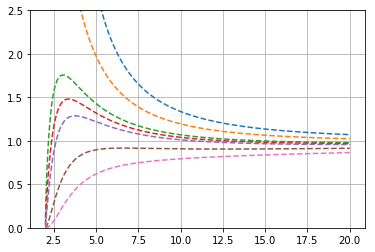

In [7]:
l=np.sqrt(30)
m=1
e=1
E=2

r = np.linspace(2.01,20,1000)
for i in [-0.9,-0.5,-0.1,0,0.1,0.5,1]:
    plt.plot(r,V_Q(r,l,m,i,e),"--")
    
plt.grid(True)
plt.ylim(0,2.5)
plt.show()



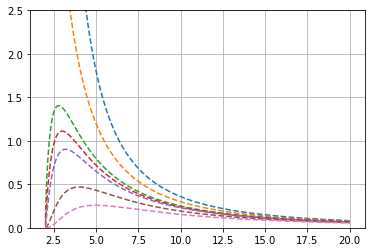

In [8]:
l=np.sqrt(30)
m=1
e=0
E=2

r = np.linspace(2.01,20,1000)
for i in [-0.9,-0.5,-0.1,0,0.1,0.5,1]:
    plt.plot(r,V_Q(r,l,m,i,e),"--")
    
plt.grid(True)
plt.ylim(0,2.5)
plt.show()

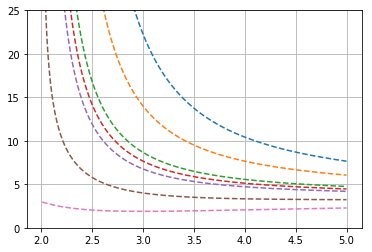

In [9]:
l=np.sqrt(30)
m=1
e=1
E=2

r = np.linspace(2.01,5,1000)
for i in [-0.9,-0.5,-0.1,0,0.1,0.5,1]:
    plt.plot(r,V_C(r,l,m,i,e,E),"--")
    
plt.grid(True)
plt.ylim(0,25)
plt.show()

## Conclusión :

Mejor utilizar el potencial efectivo de Quevedo, puesto que para q=0 se recupera la forma usual que se obtuvo para schwarzschild 


# Ecuación de movimiento

$$\left(\frac{du}{d\varphi}\right)^{2} = A(u,q)F(u,q)$$

Donde definimos por facilidad las siguientes cantidades

$$A(u,q) = \frac{(1-mu)^{2q(2+q)}}{(1-2mu)^{q(4+q)}}\quad \longrightarrow \quad \frac{dA}{du} = \frac{2mq(2+mqu)(1-mu)^{2q(2+q)-1}}{(1-2mu)^{q(4+q)+1}}$$

$$F(u,q) =\frac{E^{2}}{l^{2}} - (1 - 2 mu)^{(1 + q)}\left(u^2(1 - 2mu)^q + \frac{e}{l^2}\right)\quad \longrightarrow \frac{dF}{du} = \frac{2(1-2mu)^q}{l^2} [  e m(1+q) + l^2 u (1-2mu)^q (um(3+2q)-1) ]$$

Ahora la ecuación diferencial que se quiere resolver esla siguiente

$$\frac{d^{2}u}{d\varphi^{2}} = \frac{1}{2}\left( \frac{dA}{du}F + A\frac{dF}{du}\right)$$

Nuevamente para resolverla se reescribe  $$\frac{du}{d\varphi}=v\ \ \ \ \ \ \ \text{y} \ \ \ \ \ \ \ \ \ \frac{dv}{d\varphi}= \frac{1}{2}\left( \frac{dA}{du}F + A\frac{dF}{du}\right)$$

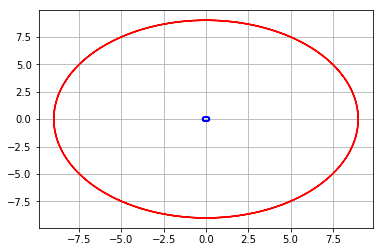

In [11]:
def A(u,q):
    return (1-m*u)**(2*q*(2+q)) / ((1-2*m*u)**(q*(4+q)))

def dAdu(u,q):
    return 2*m*q*(2+m*q*u)*(1-m*u)**(2*q*(2+q)-1) / ((1-2*m*u)**(q*(4+q)+1))

def F(u,q):
    return E**2 / (l**2) - (1-2*m*u)**(1+q) * ( (u**2) *(1-2*m*u)**q + e/(l**2))

def dFdu(u,q):
    return ( 2*(1-2*m*u)**q /(l**2) ) * ( e*m*(1+q) + (l**2) *u*(1-2*m*u)**q * (u*m*(3+2*q)-1)  )
    
#print q    
# 1) ecuación diferencial:
def dudphi(Y,t):
    u,v = Y
    a = A(u,q)*dFdu(u,q)
    b = dAdu(u,q)*F(u,q)
    dYdt = [v,(1/2)*(a+b)]
    return dYdt


# 2) rango 
phi = np.linspace(0. ,6*np.pi,100000)

# 3) constantes
q = 0.
e = 1.
l = 1
m = 0.1
E = 2.


# 4) Condiciones iniciales
u0 = 1./9.         
v0 = 0.                  # para u' 
Y0 = [u0 ,v0]

# 5) La solución!
Y = odeint(dudphi,Y0,phi)


# Grafica
x = np.cos(phi)/Y[:,0]
y = np.sin(phi)/Y[:,0]
plt.plot(x,y,"r--")
plt.xlabel=('x (AU)')
plt.ylabel=('y (AU)')
plt.grid()
#plt.ylim(-600,800)


plt.plot(2*m* np.cos(phi),2*m* np.sin(phi),"b-")
plt.show()



64